# Create an ANN/CNN on any dataset

## Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import cifar10
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score


## ANN On Diabetes Dataset

In [6]:

# Load Diabetes Dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile Model
ann_model.compile(optimizer='adam', loss='mse')

# Train Model
ann_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


y_pred = ann_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"ANN Mean Squared Error: {mse:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 33935.4727 - val_loss: 22199.2051
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31555.3926 - val_loss: 21874.4551
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27775.1211 - val_loss: 21365.0742
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30197.0156 - val_loss: 20581.4062
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28968.7617 - val_loss: 19442.6445
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25897.2383 - val_loss: 17868.3164
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24015.0762 - val_loss: 15892.6582
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20779.7441 - val_loss: 13532.2549
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17770.3750 - val_loss: 11005.1299
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14598.0498 - val_loss: 8552.5850
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10354.7451 - val_loss: 6629.25

In [3]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

In [7]:
import random

# Select a random test sample
random_index = random.randint(0, len(X_test) - 1)
sample_input = X_test[random_index].reshape(1, -1)  # Reshape for model
true_value = y_test[random_index]

# Predict using ANN
ann_prediction = ann_model.predict(sample_input)[0][0]

print(f"🔹 True Diabetes Progression Value: {true_value:.2f}")
print(f"🔹 Predicted Value by ANN: {ann_prediction:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
🔹 True Diabetes Progression Value: 242.00
🔹 Predicted Value by ANN: 258.69


## CNN on CIFAR-10 Dataset

In [8]:
# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize Pixel Values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile Model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2840 - loss: 1.9158 - val_accuracy: 0.5059 - val_loss: 1.3500
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5033 - loss: 1.3965 - val_accuracy: 0.6039 - val_loss: 1.1309
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5825 - loss: 1.1848 - val_accuracy: 0.6548 - val_loss: 0.9849
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6257 - loss: 1.0660 - val_accuracy: 0.6889 - val_loss: 0.8927
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6627 - loss: 0.9700 - val_accuracy: 0.7030 - val_loss: 0.8594
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6843 - loss: 0.9043 - val_accuracy: 0.7126 - val_loss: 0.8423
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7056 - loss: 0.8425 - val_accuracy: 0.7162 - val_loss: 0.8061
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7266 - loss: 0.7840 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


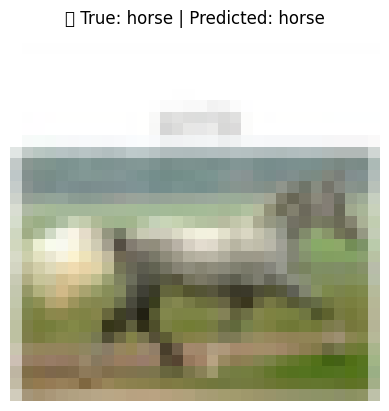

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class labels
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

#  random test image
random_index = random.randint(0, len(X_test) - 1)
sample_image = X_test[random_index]
true_label = y_test[random_index][0]

#  using CNN
cnn_prediction = cnn_model.predict(sample_image.reshape(1, 32, 32, 3))
predicted_label = np.argmax(cnn_prediction)

# Image with Prediction
plt.imshow(sample_image)
plt.title(f"🔹 True: {class_names[true_label]} | Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()
